# Numerically

#So I want you to solve this problem stated as: I have four x pixels having 10 datapoints each 1st pixel started from indices 0-9, 2nd one 1-10, 3rd one 2-11 and the 4th one having 3-12, total datapoints to be 40 in all the four pixels. So 1st dataset have slope 5, 2nd dataset slope is 3 , 3rd dataset has slope 1 and fourth dataset has slope 0.5, but the intercept of all the dataset are same taken to be 1. They have noise in it and the noise has n_avg=0 and n-standard deviation are [2,1.5,1.0.5] accordingly. Please solve this problem by using chi-square minimization and find the slope and intercept of every dataset, but to be noted the intercept must be same in all pixel we are getting after minimization. Aslo plot the pixels simultaneously in one plot only not different fits only one fit but different slope of different pixels and also intercept.

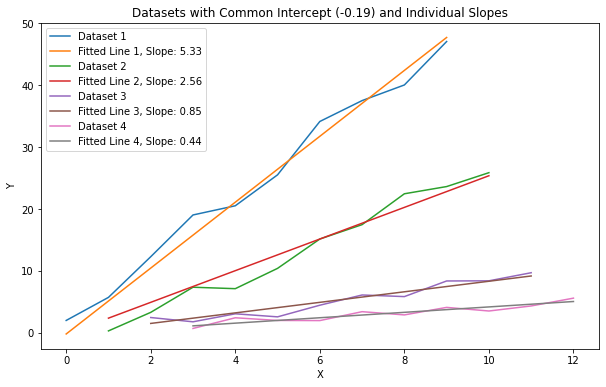

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def generate_data():
    np.random.seed(42)
    x = np.array([[i for i in range(10)], [i for i in range(1, 11)], [i for i in range(2, 12)], [i for i in range(3, 13)]])
    y = np.array([
        [5*i + 1 + np.random.normal(0, 2) for i in range(10)],
        [3*i + 1 + np.random.normal(0, 1.5) for i in range(10)],
        [i + 1 + np.random.normal(0, 1) for i in range(10)],
        [0.5*i + 1 + np.random.normal(0, 0.5) for i in range(10)]
    ])
    return x, y

def objective(params, x, y, sigma):
    num_datasets, num_points = y.shape
    
    c, slopes = params[0], params[1:num_datasets + 1]
    
    residuals = y - (slopes[:, np.newaxis] * x + c)
    weighted_residuals = residuals / sigma[:, np.newaxis]
    objective_value = np.sum(weighted_residuals**2)
    
    return objective_value

def fit_model(x, y):
    num_datasets, num_points = y.shape
    
    # Initial guess for parameters (c and slopes)
    initial_guess = np.zeros(num_datasets + 1)
    
    # Initial guess for sigma (standard deviation for each dataset)
    sigma_guess = np.ones(num_datasets)
    
    initial_guess = np.concatenate((initial_guess, sigma_guess))
    
    result = minimize(objective, initial_guess, args=(x, y, sigma_guess), method='BFGS')
    fitted_params = result.x
    
    c, slopes, fitted_sigma = fitted_params[0], fitted_params[1:num_datasets + 1], fitted_params[num_datasets + 1:]
    return c, slopes

def plot_data_with_fitted_lines(x, y, c, slopes):
    plt.figure(figsize=(10, 6))
    for i in range(4):
        plt.plot(x[i], y[i], label=f"Dataset {i+1}")

        fitted_line = slopes[i] * x[i] + c
        plt.plot(x[i], fitted_line, label=f'Fitted Line {i + 1}, Slope: {slopes[i]:.2f}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Datasets with Common Intercept ({c:.2f}) and Individual Slopes')
    plt.legend()
    plt.show()

# Main
x, y = generate_data()
c, slopes = fit_model(x, y)
plot_data_with_fitted_lines(x, y, c, slopes)


# Analytically

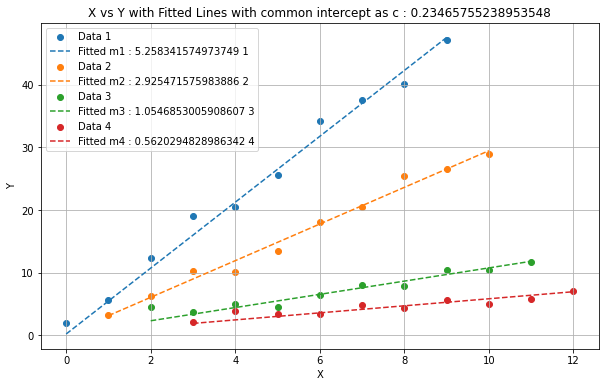

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data_with_fitted_lines(x, y, sigma):
    np.random.seed(42)

    y_ij = 0
    for i in range(len(x)):
        for j in range(len(x[i])):
            y_ij += y[i][j]

    # Calculating the Aq factor
    A_q = 0
    for i in range(len(x)):
        sum_xy = 0
        sum_x = 0
        sum_x2 = 0
        for j in range(len(x[i])):
            sum_xy += y[i][j] * x[i][j]
            sum_x += x[i][j]
            sum_x2 += (x[i][j]) ** 2
        A_q += (sum_xy * sum_x) / sum_x2

    # Calculating the Bq factor
    B_q = 0
    for i in range(len(x)):
        sum_x = 0
        sum_x2 = 0
        for j in range(len(x[i])):
            sum_x += x[i][j]
            sum_x2 += (x[i][j]) ** 2
        B_q += ((sum_x) ** 2) / sum_x2

    # Calculating sigma_a
    sigma_a = 0
    for i in range(len(x)):
        sigma_a += sigma[i] ** 2

    # Calculating the intercept coefficient
    c = (y_ij - A_q) / (len(x1)* sigma_a - B_q)

    # Calculating the slopes
    m_values = []
    for i in range(len(x)):
        sum_xy = 0
        sum_x = 0
        sum_x2 = 0
        for j in range(len(x[i])):
            sum_xy += x[i][j] * y[i][j]
            sum_x += x[i][j]
            sum_x2 += x[i][j] ** 2
        m = (sum_xy - c * sum_x) / sum_x2
        m_values.append(m)

    plt.figure(figsize=(10, 6))

    for i in range(len(x)):
        plt.scatter(x[i], y[i], label=f'Data {i + 1}')

        # Plotting the fitted line
        plt.plot(x[i], m_values[i] * x[i] + c, label=f'Fitted m{i + 1} : {m_values[i]} {i + 1}', linestyle='--')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'X vs Y with Fitted Lines with common intercept as c : {c}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
x1 = np.arange(0, 10)  # Range from 0 to 9
x2 = np.arange(1, 11)  # Range from 1 to 10
x3 = np.arange(2, 12)  # Range from 2 to 11
x4 = np.arange(3, 13)  # Range from 3 to 12
x = np.array([x1,x2,x3,x4])
y = np.array([
    [5*x1[i] + 1 + np.random.normal(0, 2) for i in range(len(x1))],
    [3*x2[i] + 1 + np.random.normal(0, 1.5) for i in range(len(x2))],
    [x3[i] + 1 + np.random.normal(0, 1) for i in range(len(x3))],
    [0.5*x4[i] + 1 + np.random.normal(0, 0.5) for i in range(len(x4))]
])
sigma = np.array([2, 1.5, 1, 0.5])

plot_data_with_fitted_lines(x, y, sigma)


Best-fitted slopes with error bars:
m1: 4.910938298064204 +/- 0.03580691498493929
m2: 2.989962314403952 +/- 0.028308531288553672
m3: 1.0173311406983125 +/- 0.0213984351181413
m4: 0.5015233370515068 +/- 0.015869808151015713
Best-fitted common intercept with error bar:
c: 0.9711131359629355 +/- 0.10263011486169717


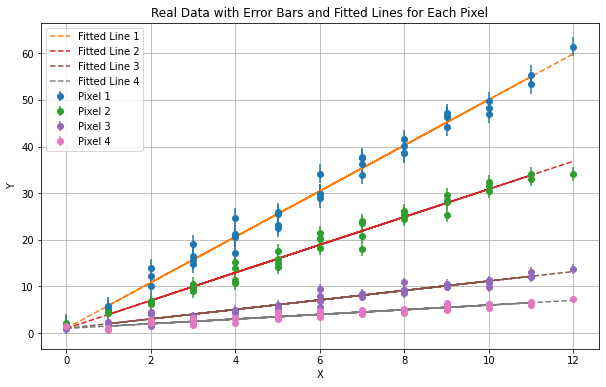

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the model function
def model_function(params, x):
    m1, m2, m3, m4, c = params
    return [m1 * x + c, m2 * x + c, m3 * x + c, m4 * x + c]

# Define the chi-square function
def chi_square(params, x, y, sigma):
    m1, m2, m3, m4, c = params
    chi_sq = 0
    for i in range(y.shape[0]):  # Iterate over pixels
        for j in range(y.shape[1]):  # Iterate over datapoints
            residual = y[i, j] - (params[i] * x[j] + c)  # Corrected index calculation
            chi_sq += (residual / sigma[i])**2
    return chi_sq

# Generate example data
np.random.seed(42)  # For reproducibility
x1 = np.arange(0, 10)  # Range from 0 to 9
x2 = np.arange(1, 11)  # Range from 1 to 10
x3 = np.arange(2, 12)  # Range from 2 to 11
x4 = np.arange(3, 13)  # Range from 3 to 12

# Concatenate the individual x arrays to create a single array
x = np.concatenate((x1, x2, x3, x4))
y = np.array([5*x + 1 + np.random.normal(0, 2, len(x)),
              3*x + 1 + np.random.normal(0, 1.5, len(x)),
              x + 1 + np.random.normal(0, 1, len(x)),
              0.5*x + 1 + np.random.normal(0, 0.5, len(x))])
y = np.squeeze(y)  # Ensure y has the correct shape
sigma = np.array([2, 1.5, 1, 0.5])

# Initial guesses for parameters
initial_params = [1.0, 1.0, 1.0, 1.0, 1.0]

# Perform minimization
result = minimize(chi_square, initial_params, args=(x, y, sigma))

# Extract fitted parameters and covariance matrix
fitted_params = result.x
cov_matrix = result.hess_inv  # Inverse Hessian matrix

# Extract standard deviations from the diagonal of the covariance matrix
std_devs = np.sqrt(np.diag(cov_matrix))

# Print fitting results with error bars
print("Best-fitted slopes with error bars:")
print("m1:", fitted_params[0], "+/-", std_devs[0])
print("m2:", fitted_params[1], "+/-", std_devs[1])
print("m3:", fitted_params[2], "+/-", std_devs[2])
print("m4:", fitted_params[3], "+/-", std_devs[3])
print("Best-fitted common intercept with error bar:")
print("c:", fitted_params[4], "+/-", std_devs[4])

# Plot the data with error bars and fitted lines
plt.figure(figsize=(10, 6))
for i in range(y.shape[0]):
    # Plot real data with error bars
    plt.errorbar(x, y[i], yerr=sigma[i], fmt='o', label=f'Pixel {i+1}')
    
    # Plot fitted values
    plt.plot(x, model_function(fitted_params, x)[i], label=f'Fitted Line {i+1}', linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Real Data with Error Bars and Fitted Lines for Each Pixel')
plt.legend()
plt.grid(True)
plt.show()

c:\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Best-fitted slopes with error bars:
m1: 5.091887814264362 +/- 0.09218052660539845
m2: 2.774870547913057 +/- 0.0642917960911794
m3: 0.9189952668835997 +/- 0.0444207091019156
m4: 0.4394472503899751 +/- 0.03156188506441852
Best-fitted common intercept with error bar:
c: 1.2888646959076926 +/- 0.2435982693599207


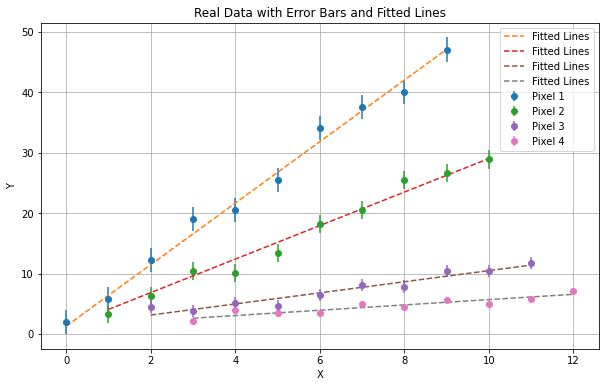

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the model function
def model_function(params, x):
    m1, m2, m3, m4, c = params
    return [m1 * x + c, m2 * x + c, m3 * x + c, m4 * x + c]

# Define the chi-square function
def chi_square(params, x, y, sigma):
    m1, m2, m3, m4, c = params
    chi_sq = 0
    for i in range(len(x)):  # Iterate over pixels
        for j in range(len(x[i])):  # Iterate over datapoints
            residual = y[i, j] - (params[i] * x[i,j] + c)  # Corrected index calculation
            chi_sq += (residual / sigma[i])**2
    return chi_sq

# Generate example data
np.random.seed(42)  # For reproducibility
x1 = np.arange(0, 10)  # Range from 0 to 9
x2 = np.arange(1, 11)  # Range from 1 to 10
x3 = np.arange(2, 12)  # Range from 2 to 11
x4 = np.arange(3, 13)  # Range from 3 to 12

# Concatenate the individual x arrays to create a single array
x = np.array([x1, x2, x3, x4])
y = np.array([
    [5*x1[i] + 1 + np.random.normal(0, 2) for i in range(10)],
    [3*x2[i] + 1 + np.random.normal(0, 1.5) for i in range(10)],
    [x3[i] + 1 + np.random.normal(0, 1) for i in range(10)],
    [0.5*x4[i] + 1 + np.random.normal(0, 0.5) for i in range(10)]
])
sigma = np.array([2, 1.5, 1, 0.5])

# Initial guesses for parameters
initial_params = [0,0,0,0,0]

# Perform minimization
result = minimize(chi_square, initial_params, args=(x, y, sigma))

# Extract fitted parameters and covariance matrix
fitted_params = result.x
cov_matrix = result.hess_inv  # Inverse Hessian matrix

# Extract standard deviations from the diagonal of the covariance matrix
std_devs = np.sqrt(np.diag(cov_matrix))
c = fitted_params[4]
errors = np.array([np.std(data - (np.arange(len(data)) + 1)) for data in y])
# Print fitting results with error bars
print("Best-fitted slopes with error bars:")
print("m1:", fitted_params[0], "+/-", std_devs[0])
print("m2:", fitted_params[1], "+/-", std_devs[1])
print("m3:", fitted_params[2], "+/-", std_devs[2])
print("m4:", fitted_params[3], "+/-", std_devs[3])
print("Best-fitted common intercept with error bar:")
print("c:", fitted_params[4], "+/-", std_devs[4])

# Plot the data with error bars and fitted lines

# Plot the data with error bars and fitted lines
plt.figure(figsize=(10, 6))
for i in range(len(x)):
    
    plt.errorbar(x[i], y[i], yerr=sigma[i], fmt='o', label=f'Pixel {i+1}')
    
    plt.plot(x[i],fitted_params[i]*x[i] + c, label='Fitted Lines', linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Real Data with Error Bars and Fitted Lines')
plt.legend()
plt.grid(True)
plt.show()